<a href="https://colab.research.google.com/github/AneVillanueva/03MIAR_Algoritmos-de-optimizacion/blob/main/Algoritmos_Ane_Villanueva_Trabajo_Practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Prácitco<br>

<font color="gray">**Asignatura: Algoritmos de Optimización**


<font color="darkcyan">Nombre y apellidos: Ane Villanueva Etxebarria

Link repositorio GitHub: https://github.com/AneVillanueva/03MIAR_Algoritmos-de-optimizacion
<br>


<hr>
<br>


**Problema seleccionado:** <font color="darkcyan">**PROBLEMA 1 - ORGANIZAR SESIONES DE DOBLAJE**








<br>
<hr>
<br>


<font color="red"> ( * )
<font color="gray">*La respuesta es obligatoria*

<br>
<hr>
<br>

**Descripción del problema:**

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben. No es posible grabar más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los servicios de los actores de doblaje sea el menor posible.

<br>

<hr><hr>

## 1. Introducción

En este apartado, se ha introducido una breve descripción de los datos que se han proporcionado (datos que definen el problema a resolver), y se ha realizado una breve descripción y definición matemática del problema de optimización que se plantea.

### 1.1. Presentación de los datos

Se cuenta con 10 actores de doblaje, y en total son 30 las tomas a grabar. Concretamente, la participación de cada actor en cada toma se puede observar en la siguiente imagen:

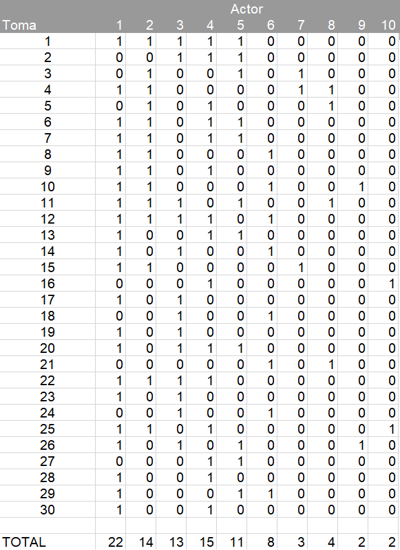

In [2]:
from PIL import Image
import IPython.display as display
image_path = '/content/Imagen_Datos_Rodaje.png'

image = Image.open(image_path)
new_size = (400, 550)
resized_image = image.resize(new_size)

display.display(resized_image)

Por lo tanto, asignando valores del 1 al 10 para identificar cada uno de los actores, y enumerando las tomas de 1 a 30, en la tabla de datos se puede observar que si el actor $j$ participa en la toma $i$, entonces tendrá un valor de 1 en la casilla $(i, j)$, y en caso contrario tendrá un 0, para $i=1, …, 30$ y $j=1, …, 10$.

### 1.2. Planteamiento matemático del problema

Para comprender mejor el problema de optimización que se plantea, se ha intentado realizar el planteamiento matemático del problema de optimización en cuestión. Para ello, ha sido necesario definir tres tipos de variables binarias. En todas las variables, el índice $i$ representará a cada doblaje, el índice $j$ a cada actor y, por último, el índice $k$ a cada día comprendido en la organización. Como no está previamente definido el número de días en los que se tienen que organizar los doblajes, de cara a facilitar la escritura del problema, asumiremos que todas las sesiones de doblaje se realizarán en $D$ días. En principio, $D$ no podrá superar el número total de doblajes a realizar: en este caso, 30.

Teniendo en cuenta esta información, definiremos los siguientes tipos de variables, para $i=1, …, 30$, $j=1, …, 10$ y $k=1, …, D$:

<br>

- $
X_{ijk} = \begin{cases}
  1,\text{ si el doblaje } i \text{ lo realiza el actor } j \text{ el día } k\\
  0,\text{ en otro caso}
\end{cases}
$

<br>

- $
Y_{jk} = \begin{cases}
  1,\text{ si el actor } j \text{ se desplaza el día } k\\
  0,\text{ en otro caso}
\end{cases}
$

<br>

- $
Z_{ik} = \begin{cases}
  1,\text{ si la toma } i \text{ se realiza el día } k\\
  0,\text{ en otro caso}
\end{cases}
$

Por lo tanto, teniendo en cuenta la definición de estas variables, la función objetivo será la siguiente:

\begin{align}
\text{min }Z = \sum_{j=1}^{10}\sum_{k=1}^D Y_{jk}
\end{align}

El coste del desplazamiento no se ha introducido en la ecuacion, debido a que todos los actores tienen el mismo coste de desplazamiento y, por tanto, el valor de este no afecta en la función a optimizar.


Por otro lado, teniendo en cuenta el enunciado, las restricciones necesarias para resolver el problema son las siguientes:

- Cada toma se graba en un solo día: $\sum_{k=1}^D Z_{ik} =1, \forall i$

<br>

- Cada actor participa en las tomas que previamente se le han asignado: $X_{ijk}=0$, para todas las tomas $i$ en las que el actor $j$ no ha sido asignado.

<br>

- Los actores deben coincidir en las tomas comunes: $X_{ijk}=X_{imk}$, para todos los actores $j,m$ asignados en las mismas tomas.

<br>

- Máximo 6 tomas al día: $\sum_{i=1}^{30} Z_{ik} \leq 6, \forall k$

<br>

- Relación entre las variables que se han creado:
  - $Y_{jk} \geq X_{ijk}, \forall i$
  - $Z_{ik} \geq X_{ijk}, \forall j$

# 2. Respuesta a las preguntas planteadas

Tras un primer apartado introductorio, se ha procedido a responder las preguntas planteadas en este trabajo práctico. Las preguntas marcadas con un asterisco rojo <font color="red">( * )
<font color="black">son de respuesta obligatoria, mientras que el resto de preguntas se han respondido de forma complemntaria.

<hr>

<font color="red">( * )
**<font color="darkcyan"> PREGUNTA 1: <font color="black">¿Cuantas posibilidades hay sin tener en cuenta las restricciones?**
<br>
<hr>

**RESPUESTA:**

Para determinar el espacio de soluciones, se tiene que analizar el número de valores posibles para cada variable $X_{ijk}$ previamente definida. Tal y como se ha mencionado, las variables $X_{ijk}$ son variables binarias (toman valores 0 o 1). Por lo tanto, para cada variable hay 2 opciones posibles.

Dado que hay que grabar un total de 30 tomas ($i=1, …, 30$), contamos con 10 actores ($j=1, …, 10$) y un número $D$ (de momento indeterminado) de días ($k=1, …, D$), el número total de variables $X_{ijk}$ creadas es:

$$
30 \cdot 10 \cdot D = 300 \cdot D
$$

Por lo tanto, el número total de soluciones posibles en el espacio de soluciones, dejando a un lado todas las restricciones, es (teniendo en cuenta que cada variable binaria puede tomar 2 valores, 0 o 1):

$$
2^{300⋅D}
$$

Pese a que $D$ es un número indeterminado de días, podemos establecer una cota superior para este valor. Al contar con 30 tomas, en el peor de los casos, se grabará una única toma por día; es decir, en el peor de los casos, serán necesarios 30 días. Por lo tanto, la cota superior para el número de variables sería $9.000$, y la cota superior para el número de soluciones posibles sería $2^{9000}$.

<hr>

<font color="red">( * )
**<font color="darkcyan"> PREGUNTA 2: <font color="black">¿Cuál es la estructura de datos que mejor se adapta al problema? Arguméntalo.**
<br>
<hr>

**RESPUESTA:**

A pesar del planteamiento matemático realizado para describir el problema, en este caso se detalla la estructura de datos que mejor se ha considerado, a la hora de poder resolver el problema de optimización con las técnicas trabajadas en la asignatura.

Para ello, se trabajará con estructuras matriciales. Concretamente, las soluciones serán matrices de dimensiones $D$ x $N$, donde $D$ es el número de días en los que se organiza la grabación de tomas, y N el número de tomas a grabar (en este caso, 30). Por lo tanto, en cada fila de la matriz de soluciones, se indicarán mediante valores 1 las tomas que se grabarán ese día, y mediante 0 las que no serán grabadas en este día.

Para representar las soluciones se ha seleccionado esta estructura matricial, por su claridad a la hora de plasmar y estructurar las soluciones, y también para facilitar la verificación de las restricciones:

- Cada toma se tiene que grabar en un único día >> En cada columna solo podrá haber exactamente un único 1
- Cada día se pueden grabar a lo sumo 6 tomas >> En cada fila puede haber a lo sumo 6 valores 1

Por último, cabe destavar que la participación de cada actor en cada día de rodaje no está directamente representada en la solución. Sin embargo, esta información únicamente la necesitamos para calcular el valor de la función objetivo; no es necesaria para calcular soluciones factibles. Por lo tanto, utilizando la matriz de datos que inicialmente se nos proporciona (la que indica en qué toma participa cada actor), se creará una función concreta, partiendo de dicha matriz de datos y de cualquiera de las soluciones que queramos evaluar, para calcular el valor de la función objetivo: cuántos actores se trasladan en total a lo largo de los $D$ días.

<hr>

<font color="red">( * )
**<font color="darkcyan"> PREGUNTA 3: <font color="black">Según el modelo para el espacio de soluciones, ¿Cuál es la función objetivo?**
<br>
<hr>

**RESPUESTA:**

Tal y como se ha indicado en el planteamiento matemático del problema, la función objetivo en este problema es minimizar el gasto por los servicios de los actores de doblaje. El objetivo es encontrar una planificación óptima de las sesiones por día que minimice los costes asociados con los actores de doblaje. Como los costes de los actores son constantes (no varían en función de los actores ni en función de las tomas que se realicen cada día), el propio coste no se tiene en cuenta, y la función objetivo se simplifica en el número de actores desplazados cada día de doblaje organizado.

<hr>

<font color="red">( * )
**<font color="darkcyan"> PREGUNTA 4: <font color="black">Según el modelo para el espacio de soluciones, ¿Es un problema de maximización o minimización?**
<br>
<hr>

**RESPUESTA:**

Es un problema de minimización, ya que se busca minimizar el gasto por los servicios de los actores. El objetivo es encontrar la solución que resulte en el menor coste posible de los servicios de los actores de doblaje; es decir, tal y como se ha descrito en la pregunta anterior, minimizar (en cómputo global) el número de actores desplazados los días de doblaje organizados.

<hr>

**<font color="darkcyan"> PREGUNTA 5: <font color="black">Diseña un algoritmo para resolver el problema por fuerza bruta**
<br>
<hr>

**RESPUESTA:**

El problema de optimización que se plantea puede resolverse mediante un algoritmo de fuerza bruta que pruebe todas las posibles combinaciones de sesiones por día y encuentre la que minimice el gasto por los servicios de los actores de doblaje, que tal y como se ha explicado en preguntas anteriores, en este caso concreto se reduce a minimizar el número de actores desplazados en el total de los días.

Para ello, en primer lugar se ha diseñado 4 funciones necesarias:

- `tupla_a_matriz`: Es una función que convierte una tupla de longitud $n ⋅ m$ a una matriz de dimensiones $n$ x $m$.

- `suma_columnas_1`: Verifica la primera restricción: en cada columna tiene que haber un único 1 (cada toma se graba en un único día)
- `suma_filas_1_6`: Verifica la segunda restricción: en cada fila tiene que haber entre 1 y 6 unos. No puede haber una fila sin ningún 1 (puesto que indicaría que ese día no se graba ninguna toma), ni tampoco puede haber más de 6 unos (lo cual indicaría que ese día se graban más de 6 tomas).
- `funcion_objetivo`: Esta función se encarga de calcular el valor de la función objetivo: se calcula la suma del número de actores movilizados cada día.

In [3]:
# Función para convertir una tupla de longitud n*m a una matriz de tamaño n x m
def tupla_a_matriz(tupla, n, m):
    matriz = [tupla[i:i+m] for i in range(0, n*m, m)]
    return matriz

# Función para verificar si la suma de cada columna es == 1
def suma_columnas_1(matriz):
    for col in zip(*matriz):
        if sum(col) != 1:
            return False
    return True

# Función para verificar si la suma de cada fila está entre 1 y 6
def suma_filas_1_6(matriz):
    for fila in matriz:
        suma_fila = sum(fila)
        if suma_fila < 1 or suma_fila > 6:
            return False
    return True

# Función que calcula el valor de la función objetivo
def funcion_objetivo (matriz_entrada, datos):
  """
  Esta función se encarga de calcular el valor de la función objetivo.
  Para ello, se debe calcular en cuántos días diferentes se desplaza cada actor.
  Parámetros de entrada:
    - matriz_entrada: matriz n x m donde cada fila indica qué tomas se graban ese día
    - datos: matriz de datos que indica qué actor participa en cada toma

  Parámetro de salida: El valor concreto de la función objetivo: nº total de desplazamientos
  """

  funcion_objetivo = 0
  for fila in matriz_entrada:
    tomas_grabadas = [i for i, valor in enumerate(fila) if valor == 1]
    actores_movilizados = []

    for toma in set(tomas_grabadas):
      fila_actores = datos[toma]
      actores_movilizados = actores_movilizados + [i for i, valor in enumerate(fila_actores) if valor == 1]

    # Actualizar el valor de la función objetivo
    funcion_objetivo += len(set(actores_movilizados))

  return funcion_objetivo


Tras estas funciones, se ha creado una quinta función, `generar_matrices_validas`, que partiendo del número de días y el número de tomas como parámetros de entrada ($D$ y $N$, respectivamente), genera todas las combinaciones posibles de matrices $D$ x $N$ creadas por valores 0 y 1, y de todas esas opciones posibles, devuelve únicamente las matrices que cumplen las restricciones del problema; es decir, las que son soluciones factibles (no necesariamente óptimas) del problema.

In [4]:
import itertools

def generar_matrices_validas(n_dias, n_tomas):
  """
  Esta función se encargará de devolver las soluciones válidas del problema
  Parámetros de entrada:
    - n_dias = Nº de días en las que queremos organizar las tomas
    - n_tomas = Nº de tomas que tenemos que organizar (en nuestro caso, 30)

  Con estos parámetros de entrada, seguimos los siguientes pasos:
    1. Creamos en formato de tupla, todas las combinaciones posibles de valores [0,1], de longitud n_dias*n_tomas
    2. De todas las tuplas, seleccionamos las que: nº de unos = n_tomas (para asegurarnos que tenemos en cuenta todas las tomas)
    3. Las pasamos a formato matriz: filas = nº días, columnas = nº tomas > Cada fila = Qué toma se graba ese día. Por tanto:
      3.1. Verificamos que en cada columna solo hay un 1 (cada toma se graba en un único día)
      3.2. Verificamos que en cada fila hay entre 1 y 6 unos (a lo sumo 6 tomas al día)

  Elemento de salida: Una lista con todas las matrices válidas como solución al problema

  """
  matrices_validas = []
  valores_posibles = [0, 1]

  posibilidades = itertools.product(valores_posibles, repeat=n_dias*n_tomas)

  for combinacion in posibilidades:
    # Calculamos el número de tomas total > Si no coincide con el total preestablecido, la solución no nos sirve
    num_tomas_total = sum(list(combinacion))
    if (num_tomas_total != n_tomas):
      continue

    # Lo pasamos a formato matriz
    matriz = tupla_a_matriz(combinacion, n_dias, n_tomas)

    # Si la matriz tiene más de un 1 en una columna, la solución no nos sirve
    if suma_columnas_1(matriz) == False:
      continue

    # Si no tiene entre 1 y 6 unos en cada fila, la solución no nos sirve
    if suma_filas_1_6(matriz) == False:
      continue

    # En principio, con las condiciones anteriores la solución es válida > La guardamos como posible solución a verificar
    matrices_validas.append(matriz)

  return matrices_validas


Por útlimo, se ha creado el algoritmo de fuerza bruta, con el nombre de `algoritmo_fuerza_bruta`. Este algoritmo toma como parámetro de entra la matriz `datos`, que es la matriz de datos inicial que nos proporcionan (la que indica qué actor participa en cada toma; proporciona las tomas por filas, y los actores por columnas).

Como cada día se pueden grabar a lo sumo 6 tomas, sabemos que como mínimo necesitaremos $\frac{\text{nº tomas}}{6}$ días para que la solución sea factible. Del mismo modo, conocemos que, a lo sumo, las tomas serán grabadas en 30 días (equivalente, generalizando, al número de tomas a grabar), ya que como mínimo grabaremos una al día.

Por lo tanto, para cada número de días en el rango establecido (entre $\frac{\text{nº tomas}}{6}$ y el porpio nº de tomas):

1. El algoritmo genera todas las soluciones válidas (factibles) para dichas dimensiones
2. Calcula la mejor solución entre las válidas (la que proporciona el valor mínimo en la función objetivo)
3. Si la mejor solución mejora el valor de la función objetivo de la iteración anterior, esta se guarda como mejor solución, y la función sigue iterando. Sin embargo, si la solución no es mejor (respecto a la iteración anterior), entonces el hecho de añadir un día a la matriz no ayuda a mejorar la solución. Por tanto, carece de sentido seguir añadiendo días y, por ello, detenemos el algoritmo.

In [5]:
# Creamos el algoritmo de fuerza bruta, utilizando todas las funciones previamente definidas
import math

def algoritmo_fuerza_bruta (datos):
  """
  Definimos el algoritmo de fuerza bruta, partiendo únicamente de la matriz de datos que nos proporcionan al inicio.
  De esa matriz, podemos deducir directamente el número de tomas y el número de actores.
  El número de días en las que organizar las tomas no está preestablecido > Es parte del problema de optimización. Podemos acotar qué rango analizar:
    - Sabemos que a lo sumo 6 tomas al día >> Mínimo necesitaremos n_tomas/6 días

  Devuelve:
    - n_dias_sol >> nº de días en los que se obtiene la mejor solución
    - funcion_obj_sol >> Valor de la función objetivo de la mejor solución
    - matriz_sol >> Organización de tomas por día de la mejor solución
  """
  # Calculamos el número de tomas y actores
  n_tomas = len(datos)
  n_actores = len(datos[0])

  # Calculamos el nº mínimo de días que analizaremos
  min_dias = math.ceil(n_tomas/6)

  # Inicializamos la solución final
  matriz_sol = []
  n_dias_sol = 0
  funcion_obj_sol = float('inf')

  # Para cada nº de días establecido, buscamos la mejor solución.
  # Si la solución calculada mejora la anterior, seguimos.
  # Sin embargo, si no la mejora > Añadir días no mejora la solución > Paramos

  for n_dias in range(min_dias, n_tomas+1):
    print('Nº días analizado:', n_dias)

    # Inicializamos la solución parcial para cada nº de días
    matriz_sol_parcial = []
    funcion_obj_sol_parcial = float('inf')

    # Todas las soluciones posibles:
    soluciones_validas = generar_matrices_validas(n_dias, n_tomas)

    # Para cada solución, calcular el valor de la función objetivo
    # Si mejora el anterior resultado > Se convierte en la mejor solución hasta el momento
    for solucion in soluciones_validas:
      valor_fobj = funcion_objetivo (solucion, datos)
      if valor_fobj < funcion_obj_sol_parcial:
        matriz_sol_parcial = solucion
        funcion_obj_sol_parcial = valor_fobj

    # Analizamos si para este nº de días se ha mejorado la solución final
    # Si no se mejora > Añadir días no mejora la solución > Parar
    if funcion_obj_sol_parcial >= funcion_obj_sol:
      break

    else:
      matriz_sol = matriz_sol_parcial
      n_dias_sol = n_dias
      funcion_obj_sol = funcion_obj_sol_parcial

  return n_dias_sol, funcion_obj_sol, matriz_sol

# Buscar solver para resolver mediante branch and bound > VS tiene un solver (que utilice branch and bound o algo parecido)

Este algoritmo se ha probado en problemas de dimensiones mucho menores al planteado en el trabajo práctico. Estos ejemplo pequeños ayudan a comprobar el correcto funcionamiento del algoritmo de fuerza bruta. Sin embargo, dado a la multitud de soluciones posibles que pueden dar respuesta al problema original, la ejecución superaba con exceso tiempos de ejecución asumibles (se tuvo ejecutando más de 7h y no proporcionó ninguna solución).

Por tanto, se muestran los ejemplos reducidos como prueba del correcto funcionamiento del algoritmo, pero el problema original no se ha resuelto mediante este algoritmo (por exceso de tiempo en ejecución).

<font color="gray"> **Ejemplo 1:** *En la matriz de datos inicial, contamos con 6 tomas a grabar, y 3 actores. Al ser solo 6 tomas, la solución es trivial: grabar todas las tomas el mismo día.*

In [6]:
# Ejemplo 1: 6 tomas y 3 actores
datos1 = [
    [1, 1, 1],
    [0, 0, 1],
    [0, 1, 0],
    [1, 1, 0],
    [0, 1, 0],
    [1, 1, 0]
]
import time
start_time = time.time()

n_dias_sol, funcion_obj_sol, matriz_sol = algoritmo_fuerza_bruta(datos1)

tiempo_necesario = time.time() - start_time

print('Tiempo necesario (s) para obtener la solución: ', tiempo_necesario)
print('Datos de la solución óptima:')
print('Nº de días: ', n_dias_sol)
print('Valor de la función objetivo (coste): ', funcion_obj_sol)
print('Organización de tomas en días: ', matriz_sol)

Nº días analizado: 1
Nº días analizado: 2
Tiempo necesario (s) para obtener la solución:  0.003201007843017578
Datos de la solución óptima:
Nº de días:  1
Valor de la función objetivo (coste):  3
Organización de tomas en días:  [(1, 1, 1, 1, 1, 1)]


<font color="gray"> **Ejemplo 2:** *Al ejemplo anterior se le añade una toma. Es decir, contamos con 7 tomas y 3 actores.*

In [8]:
# Ejemplo 2: 7 tomas y 3 actores
datos2 = [
    [1, 1, 1],
    [0, 0, 1],
    [0, 1, 0],
    [1, 1, 0],
    [0, 1, 0],
    [1, 1, 0],
    [1, 1, 0]
]
start_time = time.time()

n_dias_sol, funcion_obj_sol, matriz_sol = algoritmo_fuerza_bruta(datos2)

tiempo_necesario = time.time() - start_time

print('Tiempo necesario (s) para obtener la solución: ', tiempo_necesario)
print('Datos de la solución óptima:')
print('Nº de días: ', n_dias_sol)
print('Valor de la función objetivo (coste): ', funcion_obj_sol)
print('Organización de tomas en días: ', matriz_sol)

Nº días analizado: 2
Nº días analizado: 3
Tiempo necesario (s) para obtener la solución:  0.9697039127349854
Datos de la solución óptima:
Nº de días:  2
Valor de la función objetivo (coste):  4
Organización de tomas en días:  [(0, 0, 0, 0, 1, 0, 0), (1, 1, 1, 1, 0, 1, 1)]


<font color="gray"> **Ejemplo 3:** *En este último ejemplo, se han aumentado las dimensiones de la matriz de datos. Se cuenta con 10 tomas y 4 actores. En este ejemplo se puede ver cómo aumenta el tiempo de ejecución del algoritmo: han sido necesarios 607.26 segundos (unos 10 minutos y 7 segundos).*

In [9]:
# Ejemplo 3: 10 tomas y 4 actores
datos3 = [
    [1, 1, 1, 1],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [1, 1, 0, 0],
    [0, 1, 0, 1],
    [1, 1, 0, 1],
    [1, 1, 0, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 0, 0]
]

start_time = time.time()

n_dias_sol, funcion_obj_sol, matriz_sol = algoritmo_fuerza_bruta(datos3)

tiempo_necesario = time.time() - start_time

print('Tiempo necesario (s) para obtener la solución: ', tiempo_necesario)
print('Datos de la solución óptima:')
print('Nº de días: ', n_dias_sol)
print('Valor de la función objetivo (coste): ', funcion_obj_sol)
print('Organización de tomas en días: ', matriz_sol)

Nº días analizado: 2
Nº días analizado: 3
Tiempo necesario (s) para obtener la solución:  607.2654414176941
Datos de la solución óptima:
Nº de días:  2
Valor de la función objetivo (coste):  6
Organización de tomas en días:  [(0, 0, 1, 1, 0, 0, 0, 1, 0, 1), (1, 1, 0, 0, 1, 1, 1, 0, 1, 0)]


<hr>

**<font color="darkcyan"> PREGUNTA 6: <font color="black">Calcula la complejidad del algoritmo por fuerza bruta**
<br>
<hr>

**RESPUESTA:**

Para calcular la complejidad del algoritmo de fuerza bruta, tenemos que analizar también la complejidad de cada una de las funciones intermedias utilizadas por el algoritmo.

- `tupla_a_matriz`: Esta función toma una tupla de longitud $n \cdot m$ y crea una matriz de tamaño $n$ x $m$. La complejidad de esta función es $O(n \cdot m)$, ya que se necesita iterar sobre todos los elementos de la tupla y dividirlos en sublistas de tamaño m.

- `suma_columnas_1`: Esta función verifica si la suma de cada columna de la matriz es igual a 1. Se itera sobre cada columna, lo cual tiene una complejidad de $O(m)$, donde $m$ es el número de columnas.

- `suma_filas_1_6`: Esta función verifica si la suma de cada fila está entre 1 y 6. Se itera sobre cada fila, lo cual tiene una complejidad de $O(n)$, donde $n$ es el número de filas.

- `funcion_objetivo`: Esta función calcula el valor de la función objetivo. Se itera sobre cada fila de la matriz de entrada y realiza operaciones que tienen complejidad $O(m)$ en cada iteración, donde $m$ es el número de columnas de la matriz de datos.

- `generar_matrices_validas`: Esta función genera todas las matrices válidas posibles. Utiliza `itertools.product` para generar todas las combinaciones posibles de valores [0, 1], lo cual tiene una complejidad de $O(2^{n\cdot m})$. Después, realiza verificaciones sobre cada combinación, lo cual tiene una complejidad dependiente de $n$ y $m$.

Tras analizar cada uno de los algoritmos intermedios utilizados en el algoritmo de fuerza bruta, se puede concluir lo siguiente sobre el algoritmo principal creado:

- El algoritmo `algoritmo_fuerza_bruta` itera sobre diferentes números de días y genera todas las soluciones válidas para cada número de días. Después, calcula la función objetivo para cada solución, lo cual tiene una complejidad dependiente de n y m. En el peor de los casos, podría llegar a tener una complejidad de $O(2^{n\cdot m})$, ya que genera todas las combinaciones posibles de soluciones.

Por lo tanto, tras analizar la complejidad de todos los algoritmos intermedios y del propio algoritmo de fuerza bruta, se puede concluir que este último tiene una complejidad exponencial en función del número de filas y columnas de las matrices involucradas; es decir, $O(2^{n\cdot m})$. Esto se debe a la generación de todas las posibles combinaciones de soluciones válidas.

<hr>

<font color="red">( * )
**<font color="darkcyan"> PREGUNTA 7: <font color="black">Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta por qué crees que mejora el algoritmo por fuerza bruta**
<br>
<hr>

**RESPUESTA:**

Para mejorar el algoritmo por fuerza bruta, se ha decidido programar un **algoritmo heurístico de búsqueda local**. En primer lugar, se presentan las funciones intermedias y la propia función de búsqueda local diseñada. Posteriormente, se resuelve el ejemplo proporcionado al inicio de este trabajo y, finalmente, se argumentan las razones por las cuales este algoritmo de búsqueda local mejora el algoritmo por fuerza bruta.

En primer lugar, se han programado 3 funciones intermedias, necesarias en el algoritmo de búsqueda local:

- `solucion_inicial`: Partiendo del número de días y tomas ($D$ y $N$), genera una solución aleatoria (matriz $D$ x $N$) que cumple los requisitos necesarios para ser una solución factible del problema.

- `funcion_objetivo`: Calcula el valor correspondiente a la función objetivo (de la misma manera que en el algoritmo de fuerza bruta)

- `generar_vecina`: genera una solución vecina asociada a la solución que se está evaluando en ese momento. Concretamente, realiza intercambios dos a dos entre las diferentes tomas, y devuelve la mejor modificación.

In [10]:
import random

# Función para crear la solucion incial
def solucion_inicial(n_dias, n_tomas):
  ind_disponibles = set(range(n_tomas))
  unos_disponibles = n_tomas
  # Creamos una matriz entera de ceros
  solucion = [[0]*n_tomas for fila in range(n_dias)]

  for fila in range(n_dias):
    n_unos = min(6, unos_disponibles)
    unos_disponibles -= n_unos

    ind_col = random.sample(ind_disponibles, n_unos)
    for col in ind_col:
            solucion[fila][col] = 1
            ind_disponibles.remove(col)
  return solucion

In [11]:
# Función que calcula el valor de la función objetivo
def funcion_objetivo(solucion, datos):
  """
  Esta función se encarga de calcular el valor de la función objetivo.
  Para ello, se debe calcular en cuántos días diferentes se desplaza cada actor.
  Parámetros de entrada:
    - solucion: matriz n x m donde cada fila indica qué tomas se graban ese día
    - datos: matriz de datos que indica qué actor participa en cada toma

  Parámetro de salida: El valor concreto de la función objetivo: nº total de desplazamientos
  """

  funcion_objetivo = 0
  for fila in solucion:
    tomas_grabadas = [i for i, valor in enumerate(fila) if valor == 1]
    actores_movilizados = []

    for toma in set(tomas_grabadas):
      fila_actores = datos[toma]
      actores_movilizados = actores_movilizados + [i for i, valor in enumerate(fila_actores) if valor == 1]

    # Actualizar el valor de la función objetivo
    funcion_objetivo += len(set(actores_movilizados))

  return funcion_objetivo


In [12]:
import copy

# Para generar soluciones vecinas, intercambiamos 2 tomas de día:
def generar_vecina(solucion, datos):
  mejor_solucion = []
  mejor_fobj = float('inf')

  for f1 in range(1, len(solucion)-1):
    fila1 = solucion[f1]
    f1_ind1 = [i for i,valor in enumerate(fila1) if valor == 1] # Seleccionamos indices de los 1
    for f2 in range(f1+1, len(solucion)):
      fila2 = solucion[f2]
      f2_ind2 = [i for i,valor in enumerate(fila2) if valor == 1] # Seleccionamos indices de los 1

      # Se genera una nueva solución intercambiando 2 tomas de día:
      # La toma x de la fila1 pasa a fila 2, y la toma y de la fila2 pasa a fila 1
      for i1 in f1_ind1:
        for i2 in f2_ind2:
          vecina = copy.deepcopy(solucion)
          vecina[f1][i1]=0; vecina[f1][i2]=1
          vecina[f2][i1]=1; vecina[f2][i2]=0

          # Evaluar la nueva solucion
          nueva_fobj = funcion_objetivo(vecina, datos)

          if nueva_fobj < mejor_fobj:
            mejor_solucion = vecina
            mejor_fobj = nueva_fobj


  return mejor_solucion

Por último, se ha creado el propio algoritmo de búsqueda local. Para ello, se ha creado el algoritmo `busqueda_local_v1`, que realiza el proceso de búsqueda local para una solución inicial concreta.

Sin embargo, al algoritmo de búsqueda local se le ha aplicado una mejora, para que trate de buscar mejores soluciones partiendo de diferentes soluciones iniciales. Esto se ha recogido en el algoritmo `busqueda_local_mejora`. Para ello, se ha establecido un tiempo máximo. Mientras este tiempo máximo no se supere, la función aplicará el algoritmo de búsqueda local, partiendo de diferentes soluciones iniciales, devolviendo la solución correspondiente en cada llamada. Finalmente, la mejora aplicada, devolverá la mejor solución de todas las que se hayan calculado.

In [13]:
import math

def busqueda_local_v1(datos):
  n_tomas = len(datos)
  n_dias = math.ceil(n_tomas/6) # En nuestro caso, 5 días

  solucion_ref = solucion_inicial(n_dias, n_tomas)
  mejor_solucion = solucion_ref
  mejor_fobj = funcion_objetivo(solucion_ref, datos)
  it = 0

  while(1):
    it += 1
    vecina = generar_vecina(solucion_ref, datos)
    vecina_fobj = funcion_objetivo(vecina, datos)

    if vecina_fobj < mejor_fobj:
      mejor_solucion = vecina
      mejor_fobj = vecina_fobj
      solucion_ref = vecina

    else:
      return mejor_solucion

In [14]:
import time

def busqueda_local_mejora(datos, t_max):
  start_time = time.time()
  it = 0
  mejor_fobj = float('inf')
  while  (time.time() - start_time) < t_max:
    it += 1
    # Calculamos soluciones
    sol = busqueda_local_v1(datos)
    sol_fobj = funcion_objetivo(sol, datos)
    if sol_fobj < mejor_fobj:
      mejor_solucion = sol
      mejor_fobj = sol_fobj

  print('Iteraciones realizadas: ', it)
  print('Mejor valor (fobj) obtenida: ', mejor_fobj)
  print('Mejor solución: ', mejor_solucion)

**RESOLUCIÓN DEL PROBLEMA PLANTEADO:**

Para verificar el funcionamiento del algoritmo de búsqueda local diseñado, se ha creado la matriz de datos `datos_def`, correspondiente a la matriz de datos que se porporciona en el enunciado del problema a resolver. Por tanto, en este caso resolveremos el problema inicial que se nos plantea.

In [15]:
# Problema original a resolver

datos_def = [
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
]

Como hemos añadido un tiempo máximo como criterio de parada, el algoritmo se ha ejecutado para 4 tiempos diferentes: 15 segundos, 30 segundos, 1 minuto y 2 minutos. Los resultados obtenidos se pueden analizar en las siguientes líneas de código:

In [16]:
# Solución en 15 segundos:
busqueda_local_mejora(datos_def, t_max=15)

<ipython-input-10-07c6fdf551f3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ind_col = random.sample(ind_disponibles, n_unos)


Iteraciones realizadas:  203
Mejor valor (fobj) obtenida:  28
Mejor solución:  [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]]


In [19]:
# Solución en 30 segundos:
busqueda_local_mejora(datos_def, t_max=30)

<ipython-input-10-07c6fdf551f3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ind_col = random.sample(ind_disponibles, n_unos)


Iteraciones realizadas:  384
Mejor valor (fobj) obtenida:  29
Mejor solución:  [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]]


In [20]:
# Solución en 1 minuto:
busqueda_local_mejora(datos_def, t_max=60)

<ipython-input-10-07c6fdf551f3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ind_col = random.sample(ind_disponibles, n_unos)


Iteraciones realizadas:  751
Mejor valor (fobj) obtenida:  28
Mejor solución:  [[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]]


In [21]:
# Solución en 2 minutos:
busqueda_local_mejora(datos_def, t_max=120)

<ipython-input-10-07c6fdf551f3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ind_col = random.sample(ind_disponibles, n_unos)


Iteraciones realizadas:  1521
Mejor valor (fobj) obtenida:  28
Mejor solución:  [[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]


Por lo tanto, se puede observar que en tan solo 15 segundos, se ha obtenido el mismo valor en la función objetivo que con mayor tiempo de ejecucion. Por lo tanto, teniendo en cuenta qu eel algoritmo de fuerza bruta en 7 horas de ejecución no ha sido capaz de proporcionar una solución, utilizando el algoritmo de búsqueda local en 15 segundos (y probablemente menos) obtenemos una solución que si no es la óptima, estará cerca de ella.

**REFLEXIÓN SOBRE LA MEJORA PROPORCIONADA POR EL ALGORITMO DE BÚSQUEDA LOCAL:**

Por último, pese a que se ha demostrado en el tiempo de ejecución necesario para proporcionar la solución, cabe mencionar que este algoritmo de búsqueda local mejora el algoritmo de fuerza bruta por los siguientes dos motivos principales:

- El algoritmo de fuerza bruta examina todas las posibles soluciones, y tal y como se ha visto en preguntas anteriores, esto implica un tiempo de ejecución exponencial (dependiente del tamaño del problema). Sin embargo, el algoritmo de búsqueda local parte de una solución inicial factible, y se centra en un subconjunto de soluciones cercanas a esta, limitando la búsqueda de soluciones. Esta diferencia mejora significativamente el tiempo de ejecución, a la vez que evita la exploración de soluciones no óptimas (lo cual no es necesario).

- El algoritmo parte de una solución inicial factible. Después, se realiza modificaciones pequeñas y localizadas para evaluar si la solución mejora. Si se encuentra una mejora, esta se guarda como actual solución, y se siguen explorando otra serie de modificaciones, en busca de mejoras. Por lo tanto, de alguna forma permite converger de una forma más rápida o efectiva hacia una solución óptima (aunque puede ocurrir que esta no se alcance), en comparación con el algoritmo de fuerza bruta que de alguna forma va "dando palos de ciego" evaluando todas las soluciones posibles.

<hr>

<font color="red">( * )
**<font color="darkcyan"> PREGUNTA 8: <font color="black">Calcula la complejidad del algoritmo**
<br>
<hr>

En el caso del algoritmo final  de búsqueda local creado, la complejidad está determinada por dos factores principales. Asumiendo que $D$ corresponde al número de días, y $N$ al número de tomas:

- Complejidad de la funicón `busqueda_local_v1`: Esta función realiza una búsqueda local utilizando la generación de soluciones vecinas y el cálculo de la función objetivo. La generación de soluciones vecinas tiene una complejidad aproximada de $O(D \cdot N^2)$, ya que hay dos bucles anidados que recorren las filas y columnas de la matriz de solución. El cálculo de la función objetivo tiene una complejidad de $O(D \cdot N)$, ya que se recorren todas las filas y columnas de la matriz de solución y se evalúan las tomas grabadas y los actores movilizados. La función `busqueda_local_v1` se ejecuta varias veces en el bucle de búsqueda local, por lo que la complejidad total del algoritmo se ve afectada por la complejidad de esta función.

- Complejidad del algoritmo principal `busqueda_local_mejora`: El bucle principal se repite mientras el tiempo transcurrido sea inferior a t_max. Por lo tanto, la complejidad depende del tiempo máximo de ejecución permitido. En el peor caso, si el bucle se ejecuta durante todo el tiempo máximo permitido, la complejidad estaría en función de t_max. Sin embargo, si el algoritmo encuentra una solución óptima antes de que se alcance t_max, la complejidad será menor.

Sin embargo, limitándonos al algoritmo concreto de búsqueda local `busqueda_local_v1`, partiendo de las explicaciones dadas podemos concluir que la complejidad de dicho algoritmo se corresponde con $O(D \cdot N^2)$, lo cual en el peor de los casos se traduce a $O(n^3)$, siendo $n=max\{D, N\}$.


<hr>

**<font color="darkcyan"> PREGUNTA 9: <font color="black">Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios**
<br>
<hr>

**RESPUESTA:**

Para generar un juego de datos de entrada aleatorio, se han seleccionado de forma aleatoria el número de tomas y de actores, y en función de estos datos, se ha generado aleatoriamente la matriz de datos correspondiente en el formato de los datos de entrada:

In [23]:
import random

# Generar aleatoriamente n_tomas entre 2 y 50
n_tomas = random.randint(2, 50)

# Generar aleatoriamente n_actores entre 3 y 20
n_actores = random.randint(3, 20)

# Generar aleatoriamente la matriz de datos
datos = [[random.randint(0, 1) for _ in range(n_actores)] for _ in range(n_tomas)]

# Resultados
print("n_tomas:", n_tomas)
print("n_actores:", n_actores)
print("datos:")
for fila in datos:
    print(fila)


n_tomas: 47
n_actores: 20
datos:
[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]
[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1]
[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1]
[0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 

<hr>

**<font color="darkcyan"> PREGUNTA 10: <font color="black">Aplica el algoritmo al juego de datos generado**
<br>
<hr>

**RESPUESTA:**

Se ha aplicado el algoritmo de búsqueda local, para límites de tiempo de 15 segundos, 30 segundos, 1 minuto y 2 minutos. Los resultados obtenidos se pueden analizar en las siguientes líneas de código:

In [24]:
# Solución en 15 segundos:
busqueda_local_mejora(datos, t_max=15)

<ipython-input-10-07c6fdf551f3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ind_col = random.sample(ind_disponibles, n_unos)


Iteraciones realizadas:  11
Mejor valor (fobj) obtenida:  139
Mejor solución:  [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0

In [25]:
# Solución en 30 segundos:
busqueda_local_mejora(datos, t_max=30)

<ipython-input-10-07c6fdf551f3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ind_col = random.sample(ind_disponibles, n_unos)


Iteraciones realizadas:  23
Mejor valor (fobj) obtenida:  140
Mejor solución:  [[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

In [26]:
# Solución en 1 minuto:
busqueda_local_mejora(datos, t_max=60)

<ipython-input-10-07c6fdf551f3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ind_col = random.sample(ind_disponibles, n_unos)


Iteraciones realizadas:  44
Mejor valor (fobj) obtenida:  139
Mejor solución:  [[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0

In [27]:
# Solución en 2 minutos:
busqueda_local_mejora(datos, t_max=120)

<ipython-input-10-07c6fdf551f3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ind_col = random.sample(ind_disponibles, n_unos)


Iteraciones realizadas:  89
Mejor valor (fobj) obtenida:  139
Mejor solución:  [[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

<hr>

**<font color="darkcyan"> PREGUNTA 11: <font color="black">Enumera las referencias que has utilizado (si ha sido necesario) para llevar a cabo el trabajo**
<br>
<hr>

**RESPUESTA:**

Para llevar a cabo el trabajo, se han utilizado los apuntes proporcionados por el profesor de la asignatura, así como los Notebooks desarrollados en las diferentes actividades grupales.

<hr>

**<font color="darkcyan"> PREGUNTA 12: <font color="black">Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño**
<br>
<hr>

**RESPUESTA:**

Partiendo del problema de optimización que se plantea en este trabajo, y teniendo en cuenta el algoritmo de búsqueda local diseñado, en mi opinión las tres líneas prinicpales en las que avanzar en el estudio del problema son las siguientes:

- **Análisis del algoritmo:** Se podría evaluar el rendimiento del algoritmo de búsqueda local diseñado, para diferentes tamaños de problema y naturaleza o características de los datos de entrada. Se podría analizar el funcionamiento del algoritmo para variaciones en las características del problema (como pueden ser las restricciones, modificando el número de tomas que se pueden grabar al día, por ejemplo).

- **Mejora del algoritmo:** Una línea clara es la modificación del algoritmo con el objetivo de obtener un algoritmo más eficiente. Una técnica (en relación a lo estudiado en la asignatura) sería valorar diferentes estrategias de generación de solucioines vecinas.

- **Explorar otro tipo de algoritmos para resolver el problema:** En línea a lo aprendido en esta asignatura, otro tipo de algoritmos (como por ejemplo los algoritmos genéticos) podrían implementarse, puesto que son algoritmos más sofisticados que pueden proporcionar soluciones de manera más eficiente.